In [1]:
#!pip install requests -upgrade -q 

# q - quiet which removes output

# Web Scraping 100 Most Active Stocks from Yahoo Finance

### Introduction
Web scraping is a method for extracting data from websites. This notebook demonstrates how to scrape the 100 most active stocks from the Yahoo Finance website.


### Legal Aspects
Before scraping a website, it is important to check its terms of service to ensure that web scraping is allowed. Yahoo Finance's terms of service can be found [here](https://finance.yahoo.com/finance/news/scraping-legal-us-appeals-court-191657855.html).


![yahoo_finance](https://i.postimg.cc/kGc8v5qp/64232e2dde875c1fa89eaeef-yahoo-finance-header.webp)
We’ll start by downloading the requests library so we can open the articles as files.


### Required Libraries
Before we get started, we need to install the following Python libraries:

`requests`-  for making HTTP requests to the website
`BeautifulSoup`- for parsing HTML and extracting the needed data
`pandas`- for data manipulation
`matplotlib`- for data visualization


You can install these using pip:
`pip install requests beautifulsoup4 pandas matplotlib`


### Inspecting the Web Page
Before writing the scraping code, it's crucial to inspect the web page and understand its structure. This can be done by right-clicking on the element you wish to scrape and selecting "Inspect" to open the browser's developer tools.

For this project, we are interested in scraping the 100 most active stocks listed [here.](https://finance.yahoo.com/most-active?offset=0&count=100)

In [2]:
import requests 

Here is a snapshot of the article that we will be parsing

![1](https://i.postimg.cc/jdTCsKtD/1.jpg)

## 1. Download - 100 Most Acive Stocks

In [3]:
headers = {
    'User-Agent' : 'Ben Dover',
    'From' : 'ben@outlook.com'

    }

In [4]:
url = 'https://finance.yahoo.com/most-active?offset=0&count=100'
response = requests.get(url, headers=headers)

In [5]:
response.status_code

200

Looking at the response contents as text

In [6]:
# Displaying response
url_contents = response.text
url_contents[:1000]



'<!DOCTYPE html><html data-color-theme="light" id="atomic" class="NoJs desktop" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charSet="utf-8"/><title>Most Active Stocks Today - Yahoo Finance</title><meta name="keywords" content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="See the list of the most active stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day 

We will now save our file as an html document

In [7]:
with open('yfin_most_active.html', 'w', encoding='utf-8') as file:
    file.write(url_contents)

We can create a function that downloads any url as a html file for future projects.

In [8]:
def download_web_page(url, html_title):
    headers = {
    'User-Agent' : 'Ben Dover',
    'From' : 'ben@outlook.com'

    } 
    response = response.get(url, headers=headers)
    status_code = response.status_code
    if status_code in range(200,300):
        url_contents = response.text
        with open('new_down_web_page.html', 'w', encoding="utf-8") as file:
            file.write(url_contents)
        print('Status code is within okay range of {}'.format(status_code))
    
    else:
        return

## 2. Create a BeautifulSoup document for parsing - 100 Most Active Stocks

We'll download the BeautifulSoup library so we can parse the articles.

In [9]:
#!pip install beautifulsoup4 -upgrade -q

In [10]:
from bs4 import BeautifulSoup

We shall open our file so that we can turn it into BS4 document

In [11]:
with open('yfin_most_active.html', 'r') as f:
    html_source = f.read()

In [12]:
doc = BeautifulSoup(html_source, 'html.parser')

In [13]:
type(doc)

bs4.BeautifulSoup

## 3. Parse the BeautifulSoup document - 100 Most Active Stocks

We'll now identify the tags and classes 

As you can see in the image below, the stock information is located within the `tr_tag`.

The class slightly differs as the rows are coloured differently. We can use a subset of the class, `class_=’simpTblRow’` that is common to both class types.

![2](https://i.postimg.cc/CxL1qNZY/2.jpg)

In [14]:
tr_class_tags = doc.find_all('tr', class_='simpTblRow')
tr_class_tags[:2]

[<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select APE" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/APE?p=APE" title="AMC Entertainment Holdings, Inc.">AP

In [15]:
len(tr_class_tags)

100

We have the correct number of tr tags.

Let's look at the first `tr_tag` which encompasses the stock `TSLA`


In [16]:
tr_class_tags1 = tr_class_tags[0]


If we look within the first `tr_tag` in the image below, we can see that each element of the stock is within a `td_tag`. We are going to extract these tags


![3](https://i.postimg.cc/CxL1qNZY/2.jpg)

In [17]:
td_tag = tr_class_tags1.find_all('td')
td_tag[:1]

[<td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select APE" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/APE?p=APE" title="AMC Entertainment Holdings, Inc.">APE</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td>]

We can see that the stock ticker is located within the `a_tag`. Therefore we will extract that.

In [18]:
a_tag = td_tag[0].find_all('a', recursive=False)
a_tag

[<a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/APE?p=APE" title="AMC Entertainment Holdings, Inc.">APE</a>]

## 4. Create a function to display information - 100 Most Active Stocks

We'll now create a function that can parse a `tr_tag` and create a corresponding dictionary of all the stock information.

In [19]:
def parse_stocks(tr_class_tag_with_n):
    # <td> tags contain all of the stocks info, <tr> tags contain all of the individual details, <a> tags contain exact content.

    td_tag = tr_class_tag_with_n.find_all('td')
    a_tag = td_tag[0].find('a', recursive=False)
    #Stock ticker
    ticker_name = a_tag.text.strip()
    # Stock Name
    name_tag = td_tag[1].text.replace(',',"")
    # Last Price of stock
    price_tag = float(td_tag[2].text)
    # Stock change
    daily_change_tag = td_tag[3].text
    # Percentage Change
    daily_percentage_change_tag = td_tag[4].text
    # Volume
    volume_tag = td_tag[5].text

    # Return a dictionary
    return {
        'Stock ticker' : ticker_name,
        'Stock name' : name_tag,
        'Last price of stock' : price_tag,
        'Stock change' : daily_change_tag,
        'Stock percentage change' : daily_percentage_change_tag,
        'Volume' : volume_tag,

    }


Let's apply our function to the first stock on the list, TSLA.

In [20]:
parse_stocks(tr_class_tags[0])

{'Stock ticker': 'APE',
 'Stock name': 'AMC Entertainment Holdings Inc.',
 'Last price of stock': 1.42,
 'Stock change': '-0.3100',
 'Stock percentage change': '-17.92%',
 'Volume': '134.39M'}

We will now create a fucntion that utilizes list comprehension to parse the stock information for all of our stocks at once.

In [21]:
most_active_stocks = [parse_stocks(x) for  x in tr_class_tags]
most_active_stocks[:3]

[{'Stock ticker': 'APE',
  'Stock name': 'AMC Entertainment Holdings Inc.',
  'Last price of stock': 1.42,
  'Stock change': '-0.3100',
  'Stock percentage change': '-17.92%',
  'Volume': '134.39M'},
 {'Stock ticker': 'TSLA',
  'Stock name': 'Tesla Inc.',
  'Last price of stock': 258.08,
  'Stock change': '+1.18',
  'Stock percentage change': '+0.46%',
  'Volume': '107.491M'},
 {'Stock ticker': 'PLTR',
  'Stock name': 'Palantir Technologies Inc.',
  'Last price of stock': 14.98,
  'Stock change': '-1.35',
  'Stock percentage change': '-8.27%',
  'Volume': '100.795M'}]

## 5. Create a CSV of the parsed information - 100 most Active Stocks

We can write a function that creates a CSV file from our parsed information.

In [22]:
def write_csv(items, filename):
    with open(filename, 'w') as f:
        if len(items) == 0:
            return 
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')

        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + '\n')

In [23]:
write_csv(most_active_stocks, "most-active-stocks.csv")

Let's display our csv document with the help of pandas library

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('most-active-stocks.csv')
df.head()

,Stock ticker,Stock name,Last price of stock,Stock change,Stock percentage change,Volume
0,APE,AMC Entertainment Holdings Inc.,1.42,-0.31,-17.92%,134.39M
1,TSLA,Tesla Inc.,258.08,1.18,+0.46%,107.491M
2,PLTR,Palantir Technologies Inc.,14.98,-1.35,-8.27%,100.795M
3,TLRY,Tilray Brands Inc.,2.96,0.30,+11.28%,89.162M
4,NU,Nu Holdings Ltd.,6.85,-0.19,-2.70%,49.902M


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock ticker             100 non-null    object 
 1   Stock name               100 non-null    object 
 2   Last price of stock      100 non-null    float64
 3   Stock change             100 non-null    float64
 4   Stock percentage change  100 non-null    object 
 5   Volume                   100 non-null    object 
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


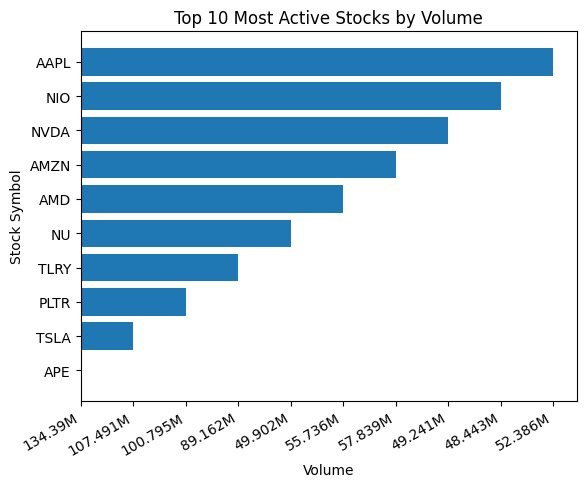

In [27]:
import matplotlib.pyplot as plt

# Convert 'Volume' to integer for plotting
# df['Volume'] = df['Volume'].str.replace('M', '').astype(int)

# Top 10 most active stocks by volume
top_10_active = df.head(10)

plt.barh(top_10_active['Stock ticker'], top_10_active['Volume'])
plt.xlabel('Volume')
plt.ylabel('Stock Symbol')
plt.title('Top 10 Most Active Stocks by Volume')
plt.xticks(rotation=30, ha="right")
plt.show()
